# eBay Laptop Analysis

This is a data exploration and analysis project that:
- Utilizes a comprehensive dataset sourced from Kaggle
- Aims to delve into the world of laptop listings on eBay
- Investigates various attributes such as brand, price, ratings, and specifications
- Employs data visualization, statistical analysis, and potentially predictive modeling
- Seeks to uncover insights into trends, patterns, and factors influencing laptop sales and prices<br>

I invite you to follow along as we conduct a thorough examination of this rich dataset to gain a deeper understanding of the dynamics within the laptop market.

Data source: https://www.kaggle.com/datasets/elvinrustam/ebay-laptops-and-netbooks-sales

## Step 1: Data Understanding and Exploration

- Importing the necessary libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Reading the Data. There are two files to open and explore.

In [2]:
# Directory path
directory = 'data'

# List files in the directory
files = os.listdir(directory)

# Print the list of files
print("Files in 'data' folder:")
for file in files:
    print(file)

Files in 'data' folder:
EbayPcLaptopsAndNetbooksClean.csv
EbayPcLaptopsAndNetbooksUnclean.csv


- Opening the first file and assigning it a dataframe

In [3]:
# File path
file_path = 'data/EbayPcLaptopsAndNetbooksClean.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   Brand   Price Currency  Color  \
0  other  303.80        $   gray   
1   dell  400.00        $  black   
2   dell  175.00        $  black   
3     hp   85.00        $  black   
4   dell  101.25        $  other   

                                            Features                Condition  \
0  Backlit Keyboard,  Built-in Microphone,  Built...                      New   
1  Backlit Keyboard, Bluetooth, Built-in Micropho...  Very Good - Refurbished   
2  10/100 LAN Card, Backlit Keyboard, Bluetooth, ...                     Used   
3  Bluetooth, Built-in Microphone, Built-in Webca...       Good - Refurbished   
4  10/100 LAN Card, Built-in Microphone, Built-in...       Good - Refurbished   

                               Condition Description  \
0  A brand-new, unused, unopened, undamaged item ...   
1  The item shows minimal wear and is backed by a...   
2  An item that has been used previously. The ite...   
3  The item shows moderate wear and is backed by ...   
4  The item show

Having printed out the first few rows of the DataFrame using the .head() method gave us a glimpse of the data's structure and the values in each column. Here's a brief overview of the columns in the DataFrame based on the printed output:

- <b>Brand:</b> The manufacturer or company that produces the laptop.
- <b>Price:</b> The cost of the laptop in USD.
- <b>Currency:</b> The currency symbol (always '$' in this case).
- <b>Color:</b> The color of the laptop.
- <b>Features:</b> Additional functionalities or specifications of the laptop.
- <b>Condition:</b> The state of the laptop (e.g., New, Used, Refurbished).
- <b>Condition Description:</b> Description of the laptop's condition.
- <b>Seller Note:</b> Additional information or notes provided by the seller regarding the laptop.
- <b>GPU:</b> The graphics processing unit responsible for rendering images and videos.
- <b>Processor:</b> The central processing unit (CPU) that powers the laptop.
- <b>Release Year:</b> The year the laptop model was released.
- <b>Maximum Resolution:</b> The highest display resolution supported by the laptop.
- <b>OS:</b> The operating system installed on the laptop.
- <b>Storage Type:</b> The type of storage technology used (e.g., SSD, HDD, eMMC).
- <b>Hard Drive Capacity:</b> The storage capacity of the traditional hard disk drive (HDD) in gigabytes (GB).
- <b>Hard Drive Capacity Unit:</b> Unit of measurement for HDD capacity (always 'gb' in this case).
- <b>SSD Capacity:</b> The storage capacity of the solid-state drive (SSD) in gigabytes (GB).
- <b>SSD Capacity Unit:</b> Unit of measurement for SSD capacity (can be 'tb' or 'gb').
- <b>Screen Size (inch):</b> The diagonal measurement of the laptop screen in inches.
- <b>Ram Size:</b> The amount of random access memory (RAM) in gigabytes (GB).
- <b>Ram Size Unit:</b> Unit of measurement for RAM size (always 'gb' in this case).

## Check for Data Types

Ensure that each column has the correct data type. For example, numerical columns should be stored as integers or floats, and categorical columns should be stored as strings or categories.

In [4]:
# Check the data types of each column
print(df.dtypes)

Brand                        object
Price                       float64
Currency                     object
Color                        object
Features                     object
Condition                    object
Condition Description        object
Seller Note                  object
GPU                          object
Processor                    object
Processor Speed              object
Processor Speed Unit         object
Type                         object
Width of the Display        float64
Height of the Display       float64
OS                           object
Storage Type                 object
Hard Drive Capacity         float64
Hard Drive Capacity Unit     object
SSD Capacity                float64
SSD Capacity Unit            object
Screen Size (inch)           object
Ram Size                    float64
Ram Size Unit                object
dtype: object


Now we will convert the 'Screen Size (inch)', 'Processor Speed', and 'Ram Size" columns to float64.

In [5]:
# Convert 'Screen Size (inch)' column to numeric, coerce errors to NaN
# df['Screen Size (inch)'] = pd.to_numeric(df['Screen Size (inch)'], errors='coerce')

# Identify rows with NaN values in 'Screen Size (inch)'
# problematic_rows = df[df['Screen Size (inch)'].isna()]

# Display the problematic rows
# print(problematic_rows[['Screen Size (inch)']])

In [6]:
# Convert 'Screen Size (inch)' column to float64
df['Screen Size (inch)'] = pd.to_numeric(df['Screen Size (inch)'], errors='coerce')

In [7]:
# Convert 'Processor Speed' column to float64
df['Processor Speed'] = pd.to_numeric(df['Processor Speed'], errors='coerce')

# Convert 'Ram Size' column to float64
df['Ram Size'] = pd.to_numeric(df['Ram Size'], errors='coerce')

# Verify the data types after conversion
print(df.dtypes)

Brand                        object
Price                       float64
Currency                     object
Color                        object
Features                     object
Condition                    object
Condition Description        object
Seller Note                  object
GPU                          object
Processor                    object
Processor Speed             float64
Processor Speed Unit         object
Type                         object
Width of the Display        float64
Height of the Display       float64
OS                           object
Storage Type                 object
Hard Drive Capacity         float64
Hard Drive Capacity Unit     object
SSD Capacity                float64
SSD Capacity Unit            object
Screen Size (inch)          float64
Ram Size                    float64
Ram Size Unit                object
dtype: object


## Explore Summary Statistics: 
Compute summary statistics (mean, median, min, max, etc.) for numerical columns to understand the distribution of the data. Use methods like .describe() in pandas.

In [8]:
# Compute summary statistics for numerical columns
summary_statistics = df.describe()

# Display summary statistics
print(summary_statistics)

             Price  Processor Speed  Width of the Display  \
count  4183.000000      2076.000000           1915.000000   
mean    328.130117         2.752042           1702.125326   
std     387.640478        17.522375            463.409973   
min       4.420000        -3.100000            800.000000   
25%     100.000000         1.800000           1363.000000   
50%     234.000000         2.400000           1920.000000   
75%     413.200000         2.800000           1920.000000   
max    3900.000000       800.000000           3840.000000   

       Height of the Display  Hard Drive Capacity  SSD Capacity  \
count            1915.000000          1104.000000   2127.000000   
mean              978.471018           227.202899    268.342266   
std               294.198849           201.231991    224.996614   
min               480.000000             0.000000      0.000000   
25%               768.000000            16.000000    120.000000   
50%              1080.000000           256.00000

The summary statistics provide valuable insights into the distribution and characteristics of the numerical columns in our dataset. Here are some observations and potential actions we can take based on the summary statistics:

- Price Distribution:
 - The mean price of laptops is around \\$328, with a wide range from \\$4.42 to \\$3900.
 - You can visualize the distribution of prices using a histogram to understand the price range and identify any outliers.

- Processor Speed:
 - The mean processor speed is approximately 2.75 GHz, with a standard deviation of 17.52 GHz.
 - There seems to be some outliers, such as negative values and extremely high values like 800 GHz. These outliers might need further investigation and possibly cleaning.

- Display Dimensions:
 - The width and height of the display have a wide range, with mean values around 1702 and 978, respectively.
 - You can visualize the distribution of display dimensions using histograms or boxplots to understand the common screen sizes.

- Storage Capacities:
 - The hard drive capacity and SSD capacity have mean values around 227 GB and 268 GB, respectively.
 - There are some laptops with 0 GB storage capacity, which might be outliers or missing values that need to be addressed.

- Screen Size:
 - The mean screen size is approximately 14.42 inches, with a standard deviation of 28.35 inches.
 - There seems to be some outliers with extremely high values like 1435 inches, which might be errors in the data.

- RAM Size:
 - The mean RAM size is around 20.48 GB, with a wide range from 1 GB to 8192 GB.
 - Similar to other numerical columns, there are outliers in RAM size that need to be investigated.

Based on these observations, visualizing the data can help in further understanding the distribution and identifying any patterns, outliers, or inconsistencies. We can create histograms, boxplots, scatter plots, or other types of visualizations to explore the data more comprehensively.

Additionally, further data cleaning and preprocessing might be necessary to address outliers, missing values, or errors before proceeding with further analysis or modeling.

## Visualizations of Our Data

Let's proceed with visualizing the data to gain more insights. We'll create visualizations for each numerical column to understand their distributions and identify any outliers or patterns. We'll use histograms for univariate distributions and scatter plots for bivariate relationships.

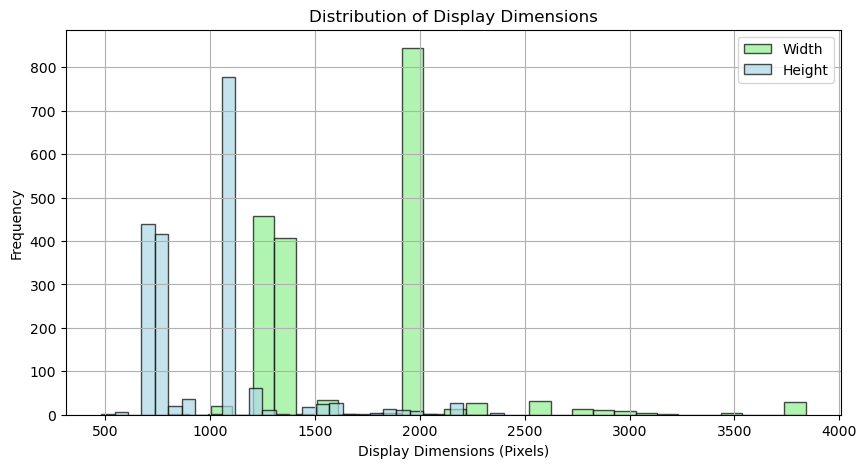

In [9]:
# Histogram for Display Dimensions
plt.figure(figsize=(10, 5))
plt.hist(df['Width of the Display'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7, label='Width')
plt.hist(df['Height of the Display'], bins=30, color='lightblue', edgecolor='black', alpha=0.7, label='Height')
plt.xlabel('Display Dimensions (Pixels)')
plt.ylabel('Frequency')
plt.title('Distribution of Display Dimensions')
plt.legend()
plt.grid(True)
plt.show()

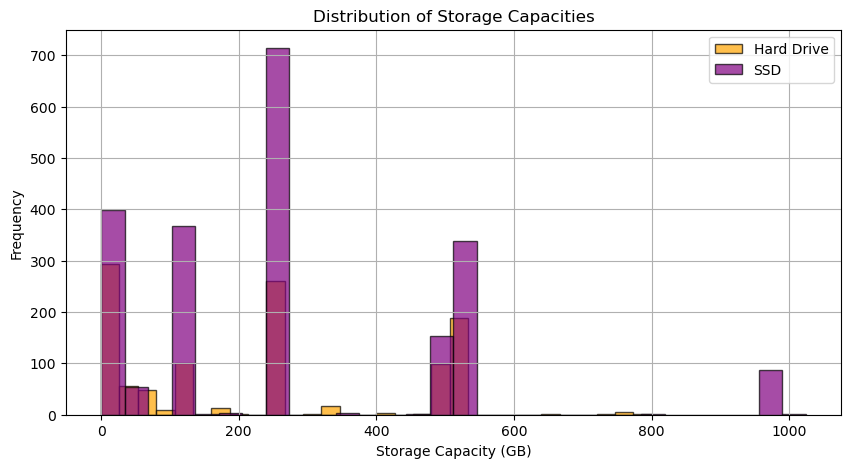

In [10]:
# Histogram for Storage Capacities
plt.figure(figsize=(10, 5))
plt.hist(df['Hard Drive Capacity'], bins=30, color='orange', edgecolor='black', alpha=0.7, label='Hard Drive')
plt.hist(df['SSD Capacity'], bins=30, color='purple', edgecolor='black', alpha=0.7, label='SSD')
plt.xlabel('Storage Capacity (GB)')
plt.ylabel('Frequency')
plt.title('Distribution of Storage Capacities')
plt.legend()
plt.grid(True)
plt.show()

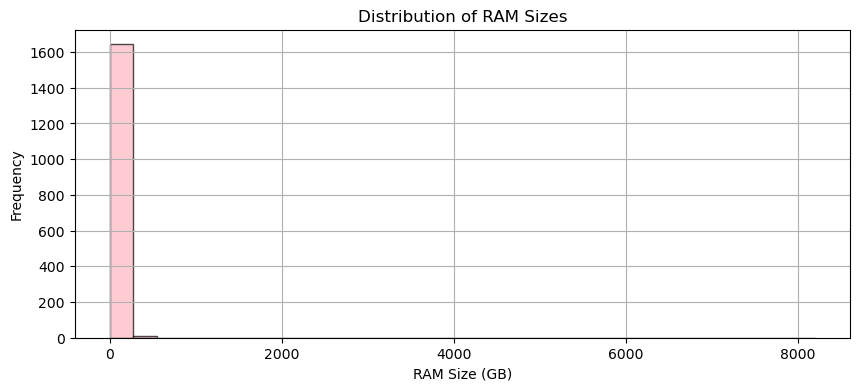

In [11]:
# Histogram for RAM Size
plt.figure(figsize=(10, 4))
plt.hist(df['Ram Size'], bins=30, color='lightpink', edgecolor='black', alpha=0.7)
plt.xlabel('RAM Size (GB)')
plt.ylabel('Frequency')
plt.title('Distribution of RAM Sizes')
plt.grid(True)
plt.show()

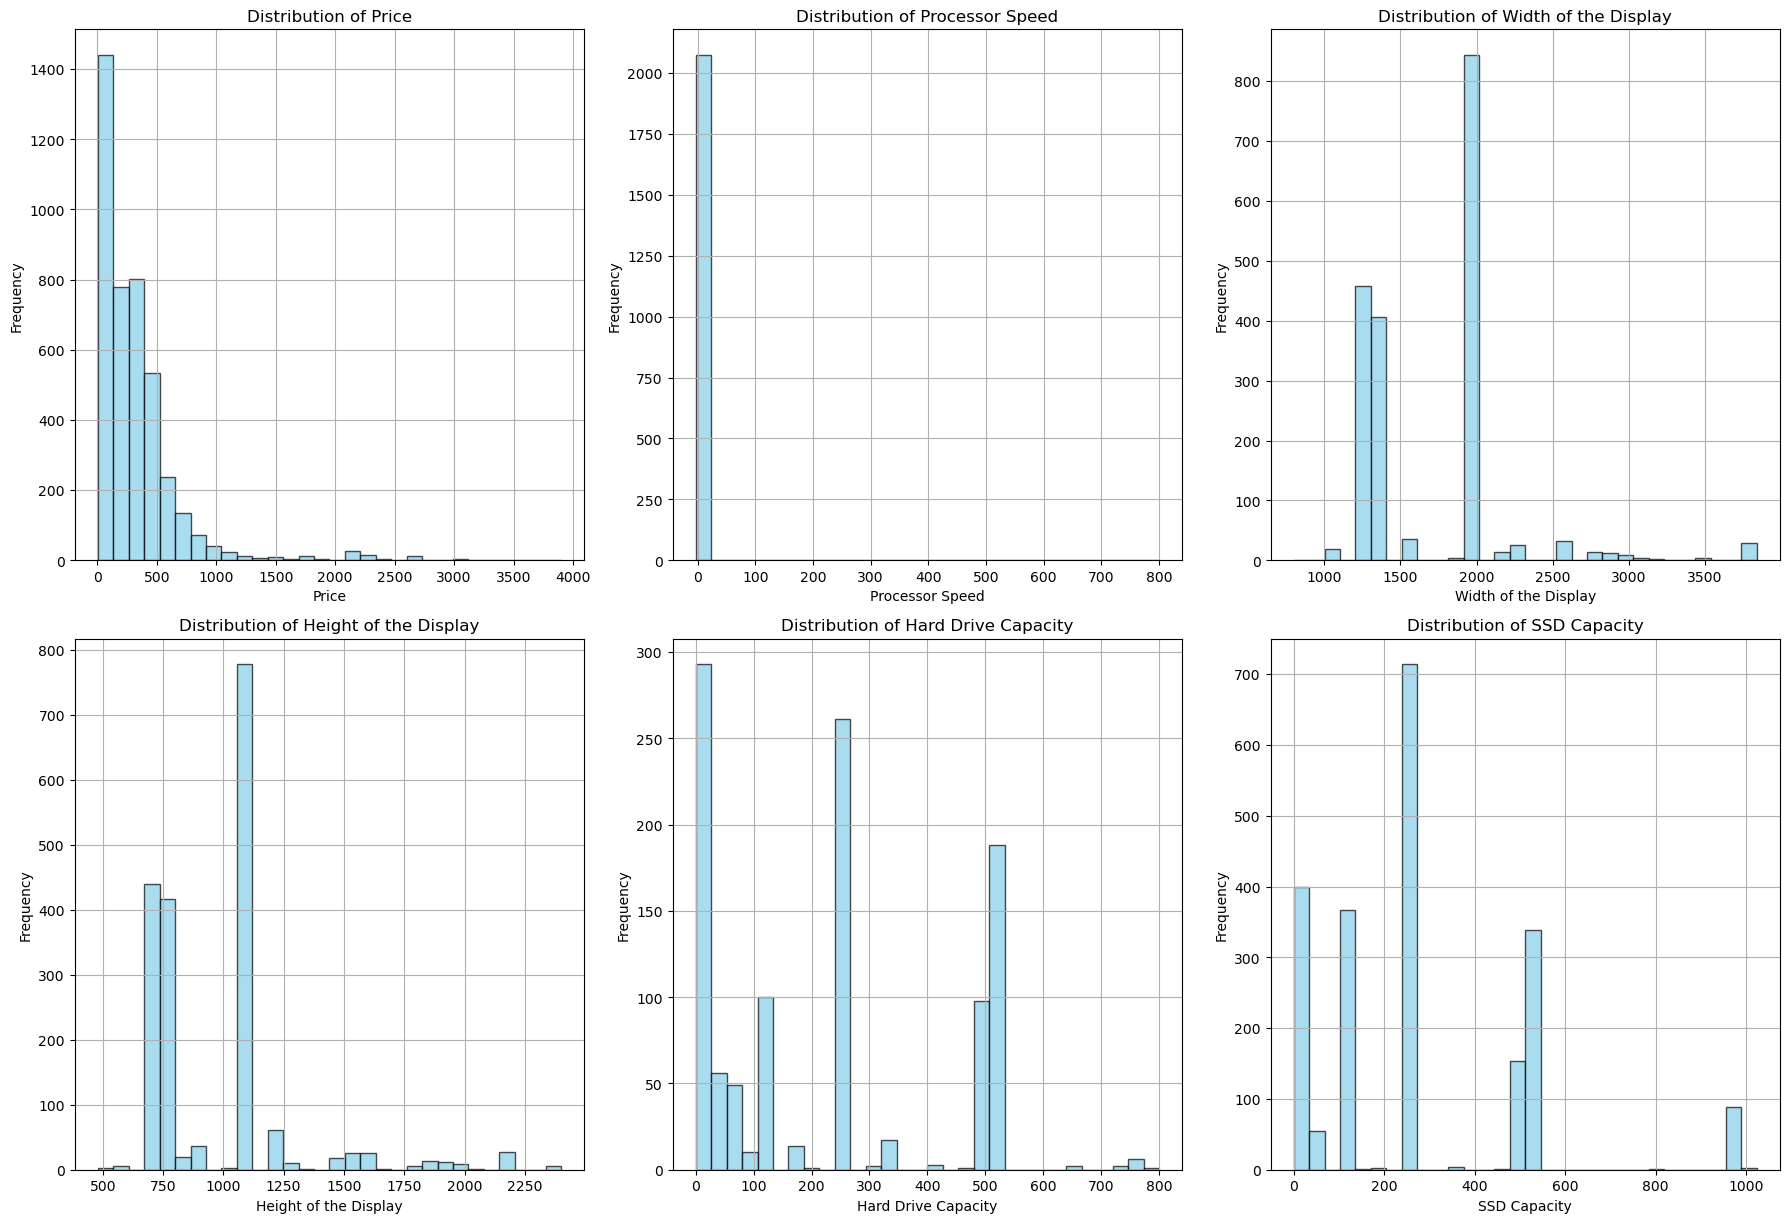

In [12]:
# Create subplots with 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Flatten the axs array to iterate over each subplot
axs = axs.flatten()

# Plot each numerical column
numerical_columns = ['Price', 'Processor Speed', 'Width of the Display', 
                     'Height of the Display', 'Hard Drive Capacity', 
                     'SSD Capacity', 'Screen Size (inch)', 'Ram Size']

for i, column in enumerate(numerical_columns):
    if i < len(numerical_columns) - 2:  # Skip the last two columns
        axs[i].hist(df[column], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        axs[i].set_xlabel(column)
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(f'Distribution of {column}')
        axs[i].grid(True)

# Remove empty subplots
for i in range(len(numerical_columns) - 2, len(axs)):
    fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()
plt.show()


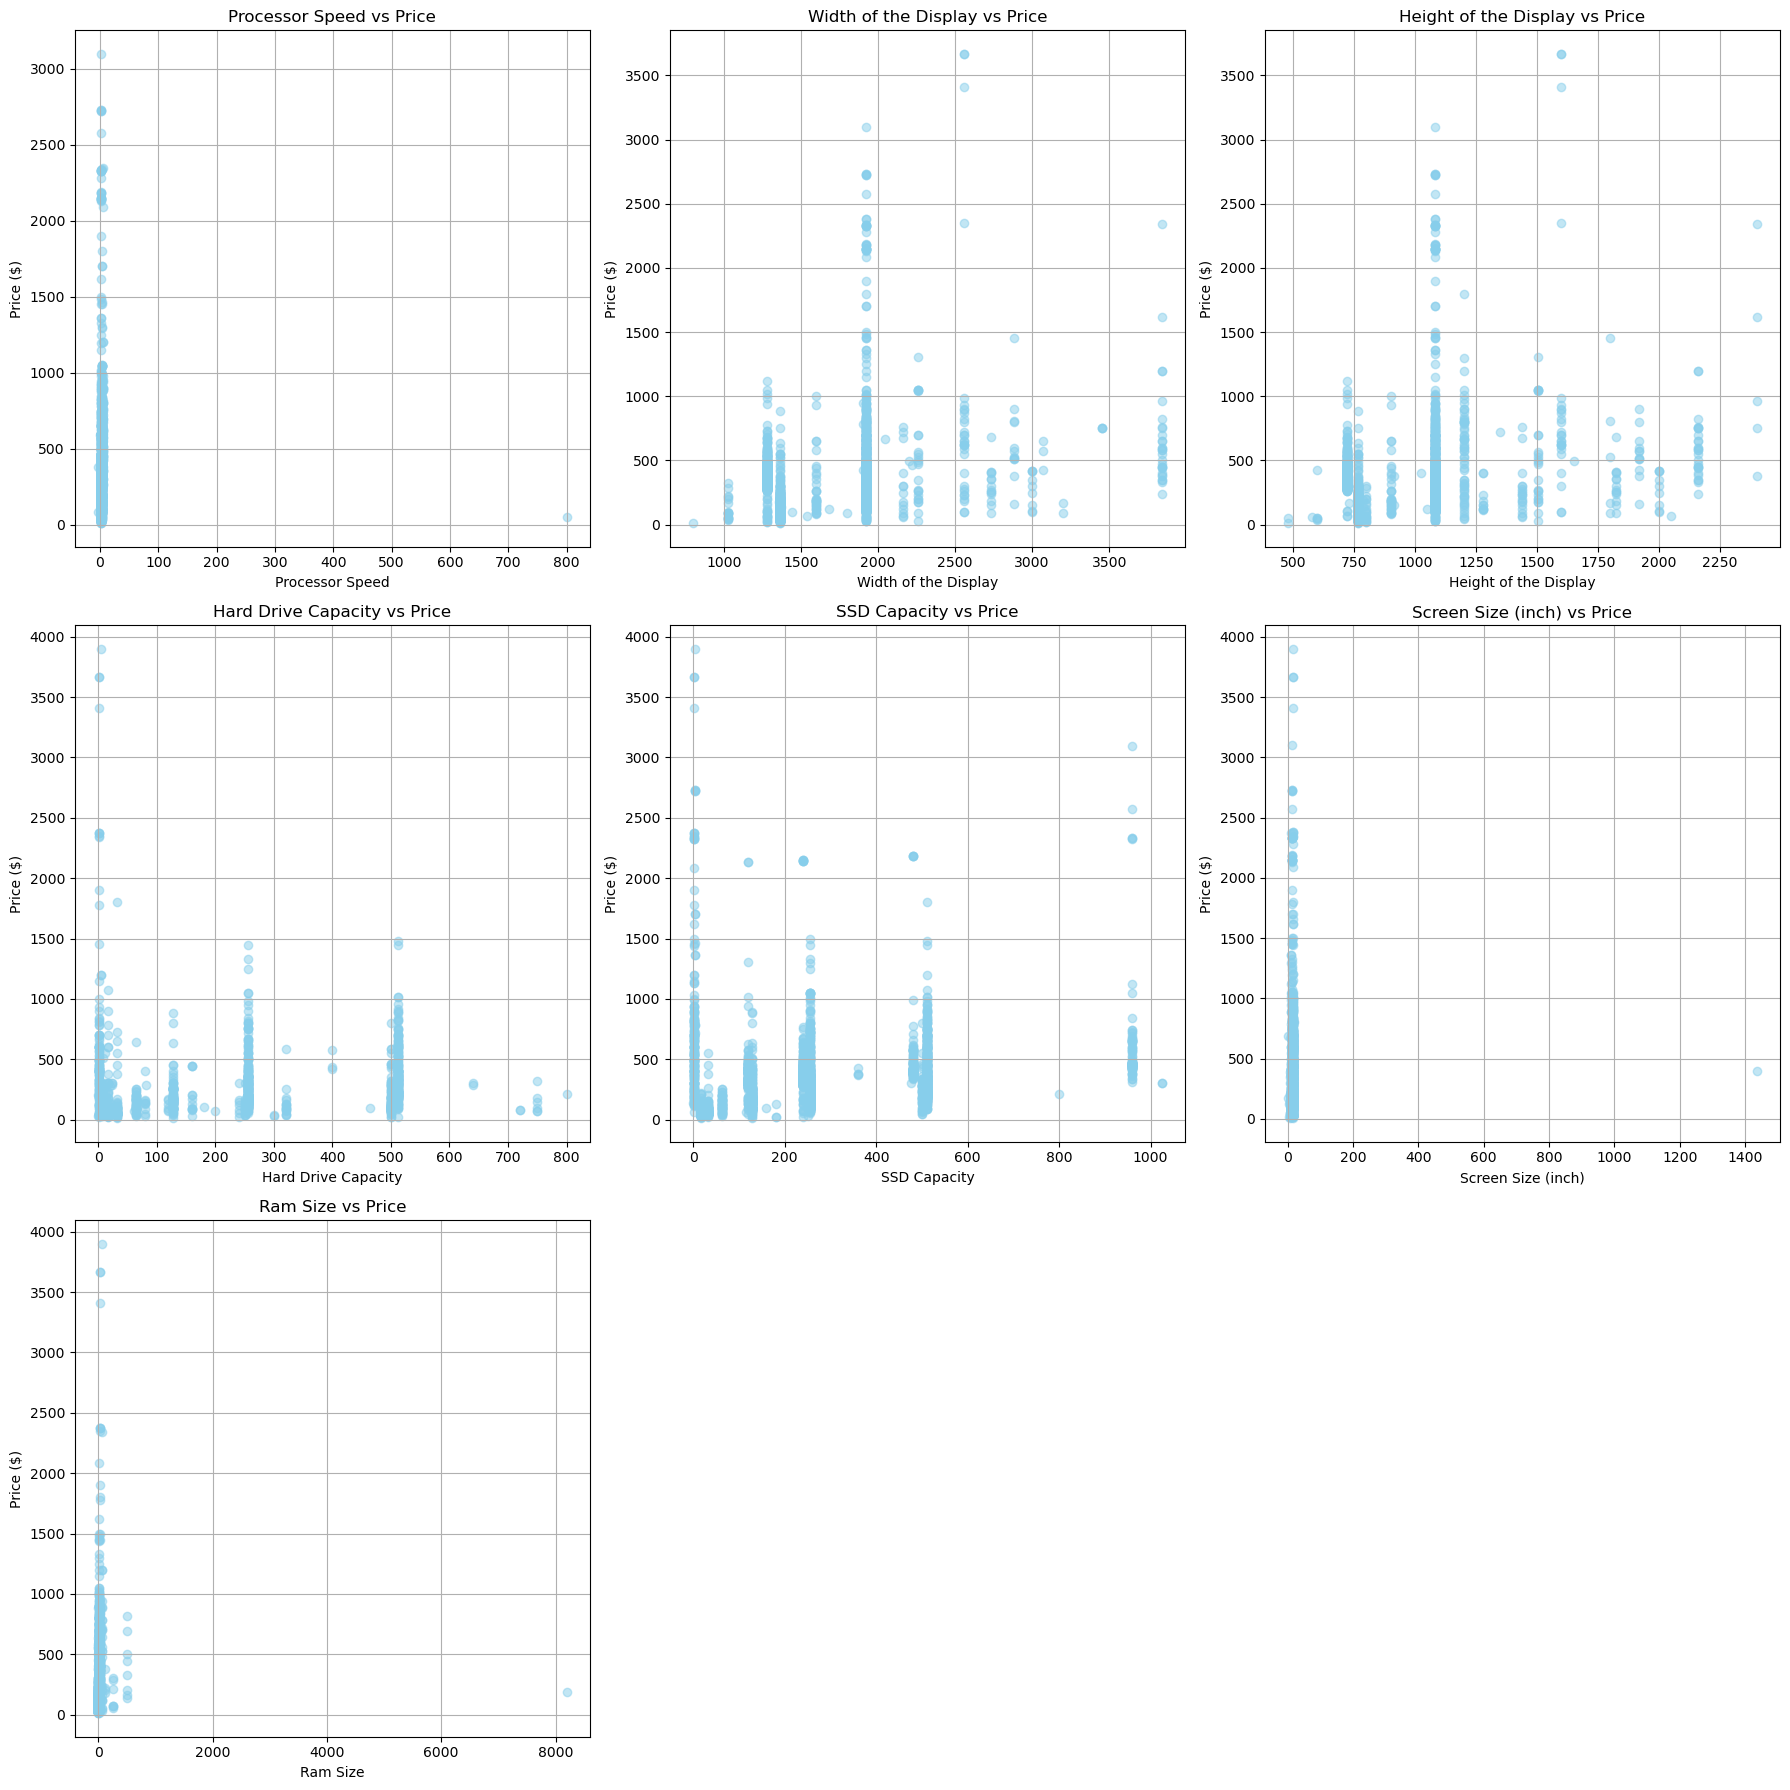

In [13]:
# Create subplots with 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Flatten the axs array to iterate over each subplot
axs = axs.flatten()

# Plot each numerical column against Price
numerical_columns = ['Processor Speed', 'Width of the Display', 
                     'Height of the Display', 'Hard Drive Capacity', 
                     'SSD Capacity', 'Screen Size (inch)', 'Ram Size']

for i, column in enumerate(numerical_columns):
    axs[i].scatter(df[column], df['Price'], alpha=0.5, color='skyblue')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Price ($)')
    axs[i].set_title(f'{column} vs Price')
    axs[i].grid(True)

# Remove empty subplots
for i in range(len(numerical_columns), len(axs)):
    fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()
plt.show()

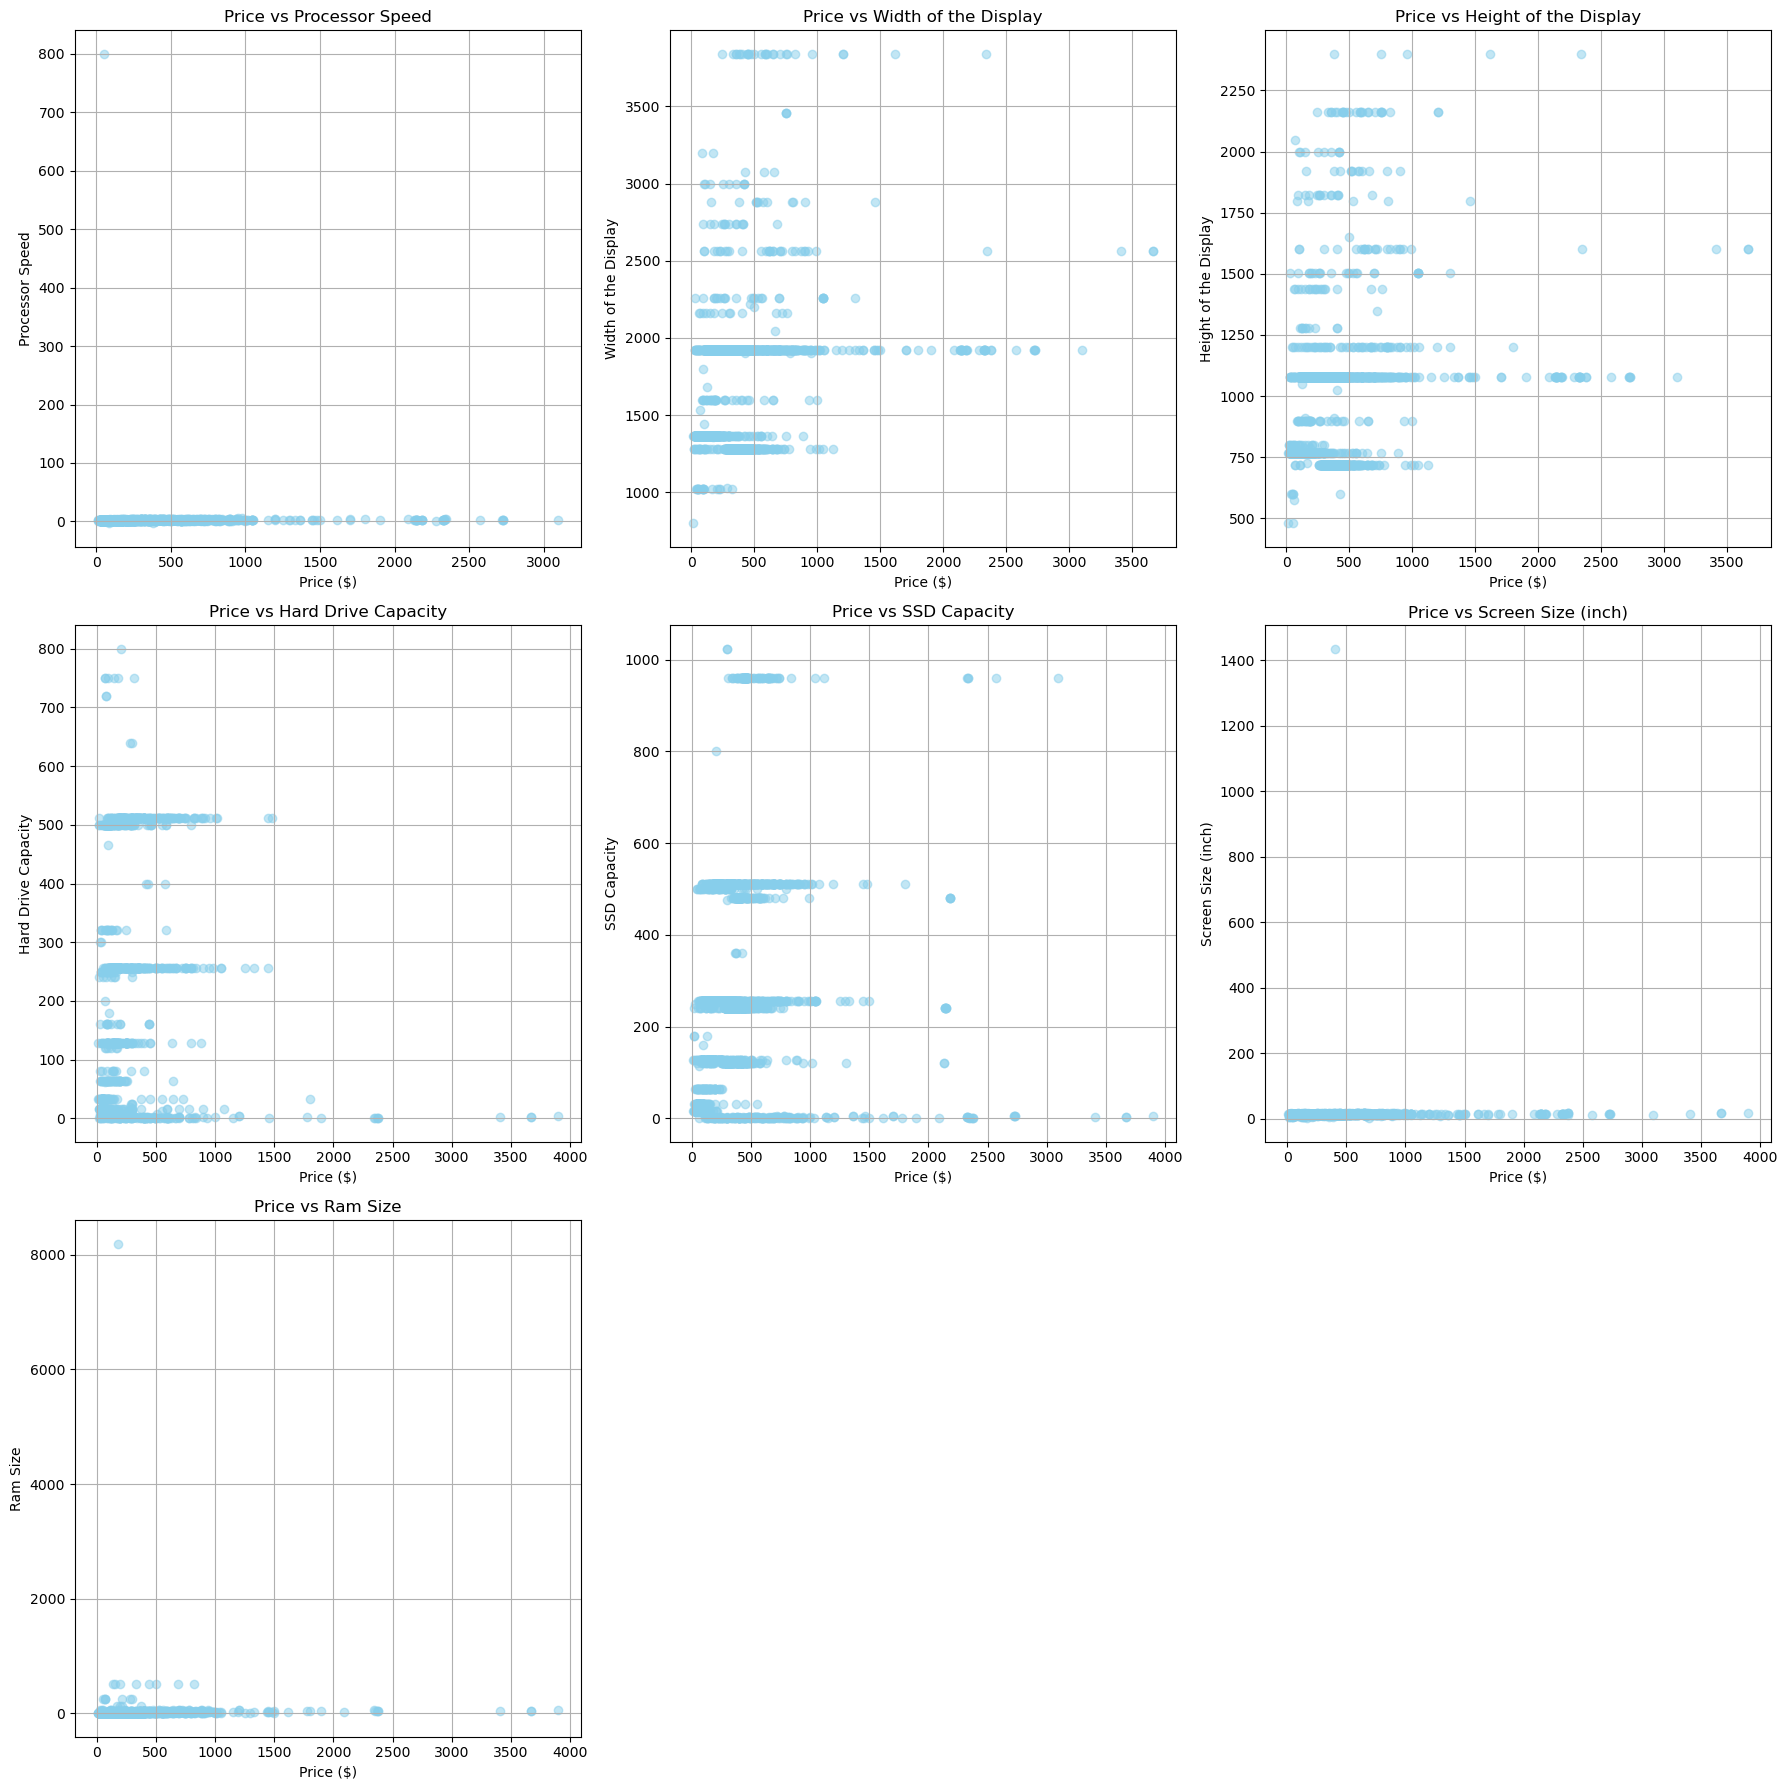

In [14]:
# Create subplots with 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Flatten the axs array to iterate over each subplot
axs = axs.flatten()

# Plot each numerical column against Price
numerical_columns = ['Processor Speed', 'Width of the Display', 
                     'Height of the Display', 'Hard Drive Capacity', 
                     'SSD Capacity', 'Screen Size (inch)', 'Ram Size']

for i, column in enumerate(numerical_columns):
    axs[i].scatter(df['Price'], df[column], alpha=0.5, color='skyblue')
    axs[i].set_xlabel('Price ($)')
    axs[i].set_ylabel(column)
    axs[i].set_title(f'Price vs {column}')
    axs[i].grid(True)

# Remove empty subplots
for i in range(len(numerical_columns), len(axs)):
    fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [15]:
# Get unique values and their frequencies for the 'Screen Size (inch)' column
screen_size_counts = df['Screen Size (inch)'].value_counts()

# Display the unique values and their frequencies
print("Unique Screen Sizes and their Frequencies:")
print(screen_size_counts)


Unique Screen Sizes and their Frequencies:
Screen Size (inch)
14.00      1017
15.60       474
11.60       237
13.30       180
12.50       147
17.30        48
13.00        46
13.50        43
15.00        41
16.00        38
14.10        34
10.10        31
12.30        24
12.00        23
15.40        22
10.80        20
17.00        14
7.00          9
12.10         8
11.00         8
15.50         6
18.00         6
10.50         6
13.40         4
10.00         3
11.50         3
4.50          2
10.30         2
14.50         2
7.20          2
2.00          2
8.10          2
16.10         2
12.20         1
9.50          1
18.40         1
12.40         1
14.20         1
13.10         1
6.10          1
13.70         1
13.90         1
10.20         1
15.61         1
10.95         1
1435.00       1
10.40         1
9.70          1
Name: count, dtype: int64


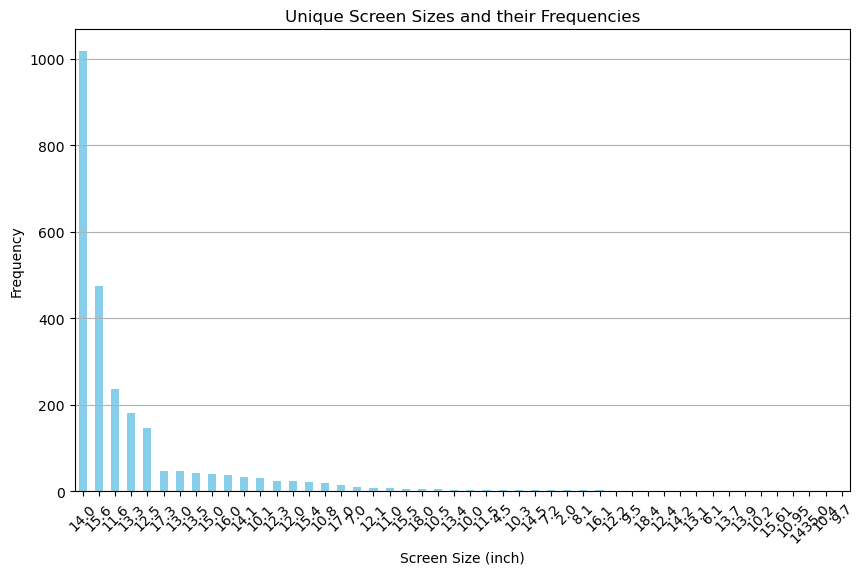

In [16]:
# Plot the unique screen sizes and their frequencies
plt.figure(figsize=(10, 6))
screen_size_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Screen Size (inch)')
plt.ylabel('Frequency')
plt.title('Unique Screen Sizes and their Frequencies')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

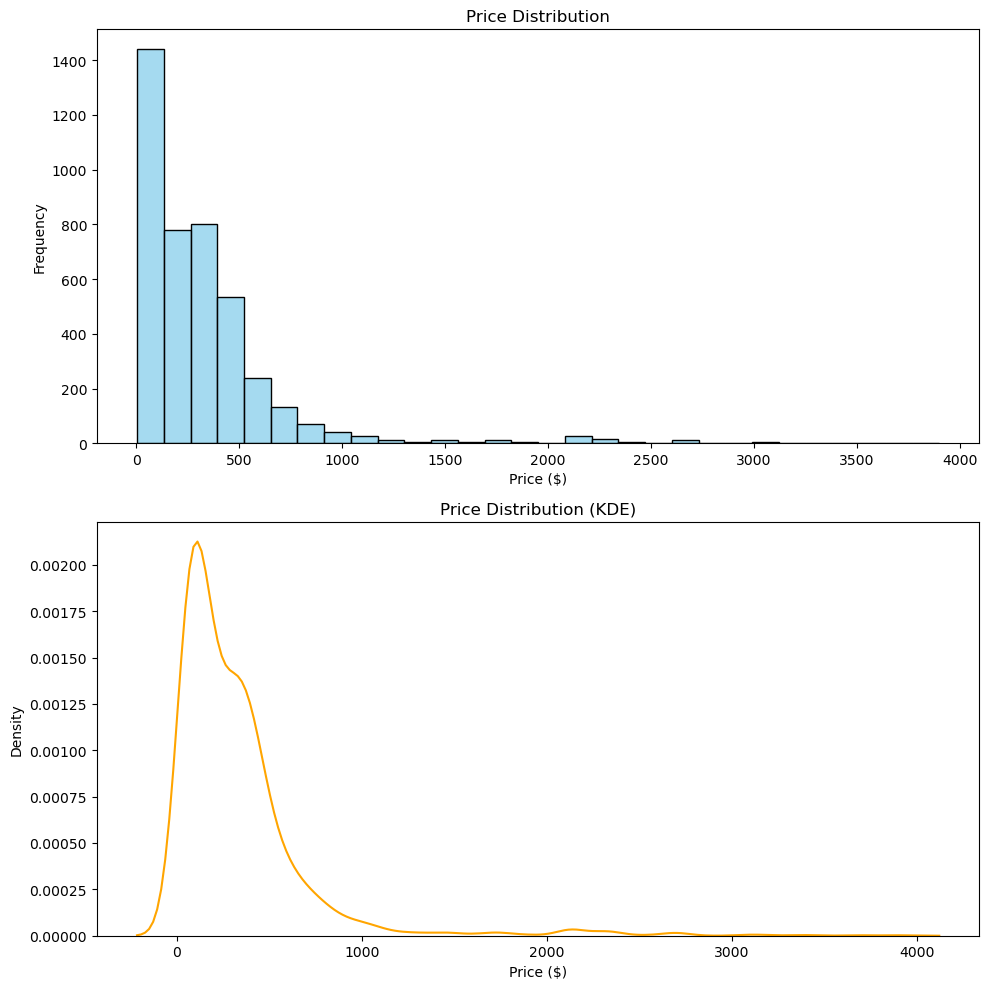

In [17]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot histogram of prices
sns.histplot(df['Price'], bins=30, kde=False, color='skyblue', ax=axes[0])
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution')

# Plot KDE plot of prices
sns.kdeplot(df['Price'], color='orange', ax=axes[1])
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Density')
axes[1].set_title('Price Distribution (KDE)')

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
# Filter the dataset to rows where the price is 0
zero_price_rows = df[df['Price'] == 0]

# Display the filtered rows
print(zero_price_rows)


Empty DataFrame
Columns: [Brand, Price, Currency, Color, Features, Condition, Condition Description, Seller Note, GPU, Processor, Processor Speed, Processor Speed Unit, Type, Width of the Display, Height of the Display, OS, Storage Type, Hard Drive Capacity, Hard Drive Capacity Unit, SSD Capacity, SSD Capacity Unit, Screen Size (inch), Ram Size, Ram Size Unit]
Index: []

[0 rows x 24 columns]


In [19]:
# Filter the dataset to rows where the price is 0
zero_price_rows = df[df['Price'] == 0]

# Display the filtered rows
print(zero_price_rows)


Empty DataFrame
Columns: [Brand, Price, Currency, Color, Features, Condition, Condition Description, Seller Note, GPU, Processor, Processor Speed, Processor Speed Unit, Type, Width of the Display, Height of the Display, OS, Storage Type, Hard Drive Capacity, Hard Drive Capacity Unit, SSD Capacity, SSD Capacity Unit, Screen Size (inch), Ram Size, Ram Size Unit]
Index: []

[0 rows x 24 columns]


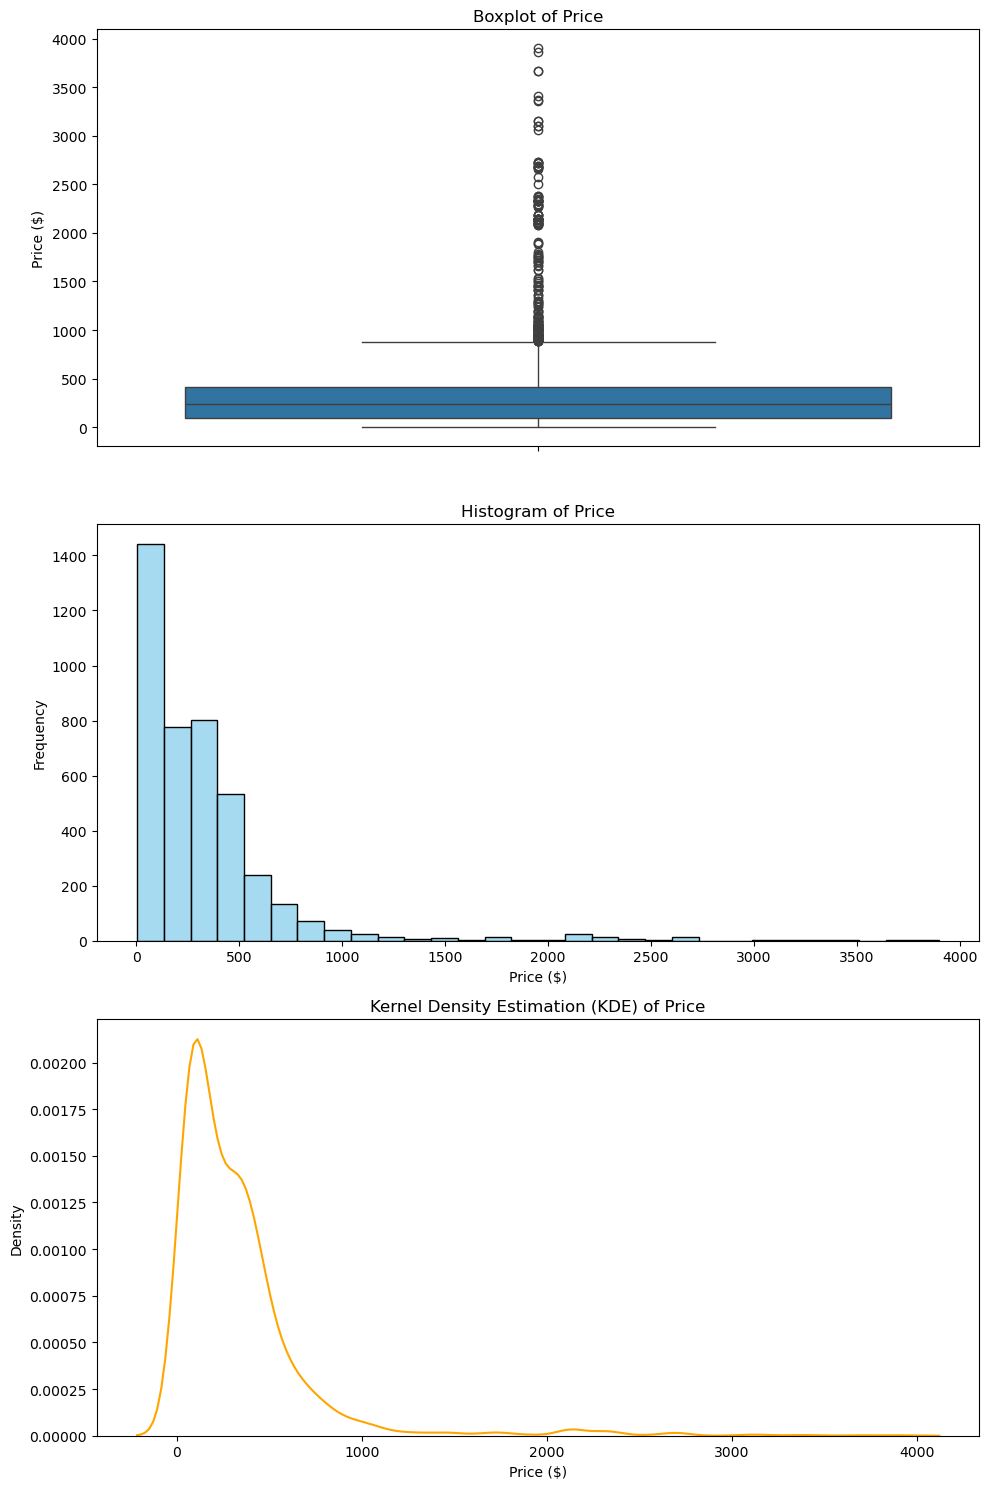

In [20]:

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot boxplot of prices
sns.boxplot(data=df['Price'], ax=axes[0])
axes[0].set_ylabel('Price ($)')
axes[0].set_title('Boxplot of Price')

# Plot histogram of prices
sns.histplot(df['Price'], bins=30, kde=False, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Price')

# Plot KDE plot of prices
sns.kdeplot(df['Price'], color='orange', ax=axes[2])
axes[2].set_xlabel('Price ($)')
axes[2].set_ylabel('Density')
axes[2].set_title('Kernel Density Estimation (KDE) of Price')

# Adjust layout
plt.tight_layout()
plt.show()


In [21]:
# Calculate summary statistics of the Price column
price_stats = df['Price'].describe()

# Print the summary statistics
print("Summary Statistics of Price:")
print(price_stats)


Summary Statistics of Price:
count    4183.000000
mean      328.130117
std       387.640478
min         4.420000
25%       100.000000
50%       234.000000
75%       413.200000
max      3900.000000
Name: Price, dtype: float64


Here are the summary statistics of the "Price" column:

- Count: 4183
- Mean: \\$328.13
- Standard Deviation: \\$387.64
- Minimum Price: \\$4.42
- 25th Percentile (Q1): \\$100.00
- Median (50th Percentile): \\$234.00
- 75th Percentile (Q3): \\$413.20
- Maximum Price: \\$3900.00

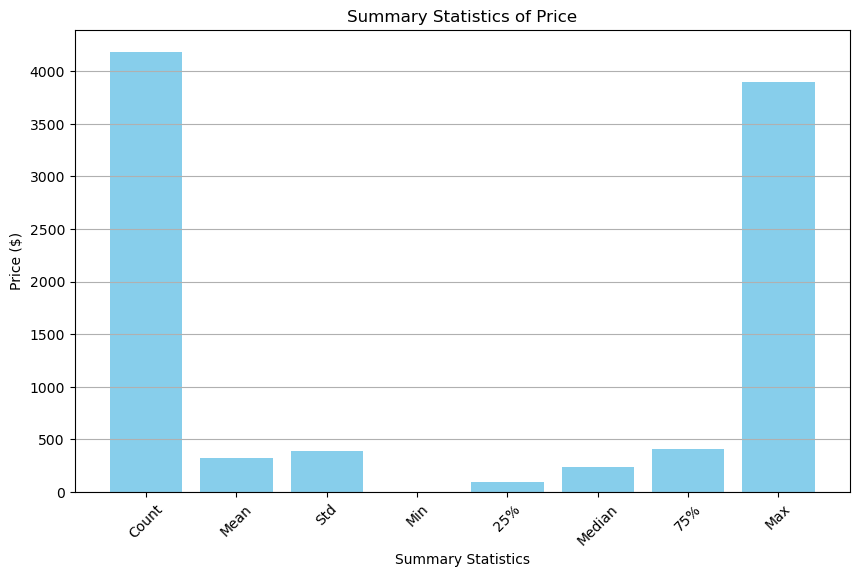

In [22]:
# Extract summary statistics
count = price_stats['count']
mean = price_stats['mean']
std = price_stats['std']
min_price = price_stats['min']
q1 = price_stats['25%']
median = price_stats['50%']
q3 = price_stats['75%']
max_price = price_stats['max']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(['Count', 'Mean', 'Std', 'Min', '25%', 'Median', '75%', 'Max'],
        [count, mean, std, min_price, q1, median, q3, max_price],
        color='skyblue')
plt.xlabel('Summary Statistics')
plt.ylabel('Price ($)')
plt.title('Summary Statistics of Price')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.show()

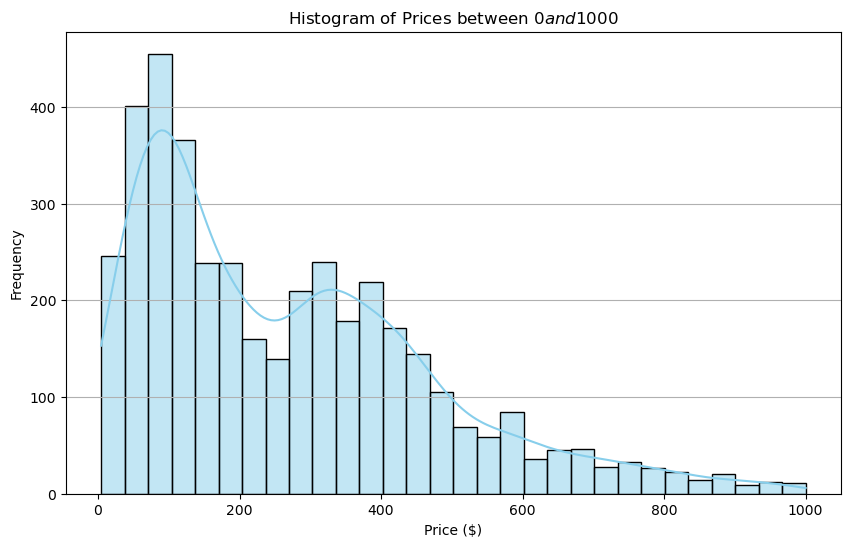

In [23]:
# Filter prices between $0 and $1000
filtered_prices = df[(df['Price'] >= 0) & (df['Price'] <= 1000)]['Price']

# Create a histogram of filtered prices
plt.figure(figsize=(10, 6))
sns.histplot(filtered_prices, bins=30, kde=True, color='skyblue')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Histogram of Prices between $0 and $1000')
plt.grid(axis='y')

# Display the plot
plt.show()


In [24]:
# Count the number of prices between $0 and $200
prices_between_0_and_200 = df[(df['Price'] >= 0) & (df['Price'] <= 200)].shape[0]

# Calculate the total number of prices
total_prices = df.shape[0]

# Calculate the percentage of prices between $0 and $200
percentage = (prices_between_0_and_200 / total_prices) * 100

# Print the percentage
print(f"The percentage of prices between $0 and $200 is: {percentage:.2f}%")


The percentage of prices between $0 and $200 is: 46.31%


In [25]:
# Count the number of prices between $0 and $300
prices_between_0_and_300 = df[(df['Price'] >= 0) & (df['Price'] <= 300)].shape[0]

# Calculate the total number of prices
total_prices = df.shape[0]

# Calculate the percentage of prices between $0 and $300
percentage = (prices_between_0_and_300 / total_prices) * 100

# Print the percentage
print(f"The percentage of prices between $0 and $300 is: {percentage:.2f}%")


The percentage of prices between $0 and $300 is: 58.28%


In [26]:
# Calculate quartiles
q1_price = df['Price'].quantile(0.25)
q2_price = df['Price'].quantile(0.50)
q3_price = df['Price'].quantile(0.75)

# Display quartile parameters
print(f"Q1 (25th percentile) price: ${q1_price}")
print(f"Q2 (50th percentile, Median) price: ${q2_price}")
print(f"Q3 (75th percentile) price: ${q3_price}")

Q1 (25th percentile) price: $100.0
Q2 (50th percentile, Median) price: $234.0
Q3 (75th percentile) price: $413.2


In [27]:
# Count the number of prices in each quartile range
prices_in_q1 = df[df['Price'] <= q1_price].shape[0]
prices_in_q2 = df[(df['Price'] > q1_price) & (df['Price'] <= q2_price)].shape[0]
prices_in_q3 = df[(df['Price'] > q2_price) & (df['Price'] <= q3_price)].shape[0]

# Calculate total number of listed prices
total_prices = df.shape[0]

# Print the results
print(f"Number of Prices in Q1: {prices_in_q1}")
print(f"Number of Prices in Q2: {prices_in_q2}")
print(f"Number of Prices in Q3: {prices_in_q3}")
print(f"Total Number of Listed Prices: {total_prices}")

Number of Prices in Q1: 1074
Number of Prices in Q2: 1019
Number of Prices in Q3: 1045
Total Number of Listed Prices: 4183


In [28]:
# Calculate the cumulative percentage of prices represented by Q1 and Q2
cumulative_percentage_q1 = (prices_in_q1 / total_prices) * 100
cumulative_percentage_q2 = ((prices_in_q1 + prices_in_q2) / total_prices) * 100

# Print the cumulative percentages
print(f"Cumulative Percentage of Q1: {cumulative_percentage_q1:.2f}%")
print(f"Cumulative Percentage of Q1 + Q2: {cumulative_percentage_q2:.2f}%")

Cumulative Percentage of Q1: 25.68%
Cumulative Percentage of Q1 + Q2: 50.04%


Based on the cumulative percentage calculation, approximately 50% of the prices in the dataset fall at or below \\$234. This means we a good chance of finding a laptop on eBay priced at \\$234 or cheaper.

In [29]:
# Filter the dataset for laptops priced around $234
target_price = 234
target_price_range = 10  # We'll consider laptops within $10 range of the target price

# Define the price range
lower_bound = target_price - target_price_range
upper_bound = target_price + target_price_range

# Filter the dataset for laptops within the price range
target_price_laptops = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Identify common features in laptops within the target price range
common_features = target_price_laptops['Features'].value_counts().head(10)

# Print the common features
print("Common Features in Laptops around $234:")
print(common_features)


Common Features in Laptops around $234:
Features
Bluetooth, Wi-Fi                                                                                                 5
Touchscreen                                                                                                      5
10/100 LAN Card, Backlit Keyboard, Bluetooth, Built-in Microphone, Built-in Webcam, Widescreen Display, Wi-Fi    3
Bluetooth, Built-in Microphone, Built-in Webcam, Touchscreen, Wi-Fi                                              2
Bluetooth, Built-in Microphone, Built-in Webcam, Wi-Fi                                                           2
Wi-Fi                                                                                                            2
Built-in Microphone, Built-in Webcam, WIFI, Bluetooth                                                            2
Backlit Keyboard, Bluetooth, Built-in Microphone, Built-in Webcam, Wi-Fi                                         2
Backlit Keyboard, Built-in Webc

In [30]:
# Filter the dataset for laptops priced around $234
target_price = 234
target_price_range = 10  # We'll consider laptops within $10 range of the target price

# Define the price range
lower_bound = target_price - target_price_range
upper_bound = target_price + target_price_range

# Filter the dataset for laptops within the price range
target_price_laptops = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Remove NaN values from the 'Features' column and split into individual features
all_features = ', '.join(target_price_laptops['Features'].dropna()).split(', ')

# Count unique features
unique_features = set(all_features)
feature_counts = {feature: all_features.count(feature) for feature in unique_features}

# Print unique features and their frequencies
print("Unique Features in Laptops around $234 and Their Frequencies:")
for feature, count in feature_counts.items():
    print(f"{feature.strip()}: {count}")


Unique Features in Laptops around $234 and Their Frequencies:
USB: 1
Force Touch Trackpad: 3
Convertible 2-in-1 Laptop/Tablet: 1
Built-in Webcam: 29
Stylus: 1
Built-in Microphone: 26
100/1000GB LAN Card: 1
Touchscreen: 5
WIFI: 2
Touchscreen: 13
Wi-Fi: 16
HD Matte 14" Display: 1
10/100 LAN Card: 9
LAN: 1
Dell Docking Station Port: 1
HDMI: 1
Integrated Webcam! Touchscreen!: 1
Smart Card reader: 1
Widescreen Display: 7
Backlit Keyboard: 20
802.11ac Wi-Fi: 1
Bluetooth: 35
Full Keyboard: 1
Force Touch Trackpad: 2
Wi-Fi Toggle: 1
Bluetooth 4.2: 1
Rugged: 1
Tablet PC: 1
Widescreen Display: 4
Built-in Microphone: 11
Touch ID: 3
Multi-Touch Trackpad: 2
Touch ID: 3
USB-C: 1
Multi-Touch Trackpad: 6
5G: 2
Convertible 2-in-1 Laptop/Tablet: 1
Bluetooth: 9
Built-in Webcam: 15
Wi-Fi: 26
Backlit Keyboard: 4


The list of unique features along with their frequencies, arranged from greatest to smallest frequency:

- Bluetooth: 44
- Built-in Webcam: 29
- Wi-Fi: 26
- Built-in Microphone: 26
- Backlit Keyboard: 24
- Touchscreen: 18
- 10/100 LAN Card: 9
- Multi-Touch Trackpad: 8
- Widescreen Display: 7
- Touch ID: 6
- Force Touch Trackpad: 5
- USB: 4
- Stylus: 4
- 5G: 2
- Full Keyboard: 2
- WIFI: 2
- Convertible 2-in-1 Laptop/Tablet: 2
- Smart Card reader: 1
- 100/1000GB LAN Card: 1
- HDMI: 1
  802.11ac Wi-Fi: 1
- HD Matte 14" Display: 1
- LAN: 1
- Tablet PC: 1
- Rugged: 1
- Dell Docking Station Port: 1
- USB-C: 1
- Wi-Fi Toggle: 1
- Integrated Webcam! Touchscreen!: 1

This list provides a clearer understanding of the most common features found in laptops priced around $234, with Bluetooth, built-in webcam, Wi-Fi, and Built-in Microphone being the most prevalent features.

In [31]:
# Define quartile ranges
Q1_range = (df['Price'] < 100)
Q2_range = (df['Price'] >= 100) & (df['Price'] <= 234)
Q3_range = (df['Price'] > 234) & (df['Price'] <= 413.20)
Q4_range = (df['Price'] > 413.20)

# Filter dataset based on quartile ranges
Q1_prices = df[Q1_range]['Price']
Q2_prices = df[Q2_range]['Price']
Q3_prices = df[Q3_range]['Price']
Q4_prices = df[Q4_range]['Price']

# Calculate mean price for each quartile
mean_price_Q1 = Q1_prices.mean()
mean_price_Q2 = Q2_prices.mean()
mean_price_Q3 = Q3_prices.mean()
mean_price_Q4 = Q4_prices.mean()

# Print the results
print("Average Price of Q1: ${:.2f}".format(mean_price_Q1))
print("Average Price of Q2: ${:.2f}".format(mean_price_Q2))
print("Average Price of Q3: ${:.2f}".format(mean_price_Q3))
print("Average Price of Q4: ${:.2f}".format(mean_price_Q4))


Average Price of Q1: $59.07
Average Price of Q2: $156.04
Average Price of Q3: $327.45
Average Price of Q4: $769.53


In [32]:
# Create a DataFrame for the quartile averages
quartile_average_df = pd.DataFrame({
    'Quartile': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Average Price': [mean_price_Q1, mean_price_Q2, mean_price_Q3, mean_price_Q4]
})

# Print the DataFrame
print(quartile_average_df)


  Quartile  Average Price
0       Q1      59.069343
1       Q2     156.037533
2       Q3     327.447177
3       Q4     769.532536


In [ ]:
# Create a DataFrame to store the features and their frequencies at each quartile
features_quartile_df = pd.DataFrame(index=['Q1', 'Q2', 'Q3', 'Q4'])

# Extract unique features and their frequencies for each quartile
for i, data in enumerate([q1_data, q2_data, q3_data, q4_data]):
    features = data['Features'].str.split(', ').explode().value_counts()
    features_quartile_df[f'Q{i+1}'] = features

# Replace NaN values with zeros
features_quartile_df.fillna(0, inplace=True)

# Calculate the average price for each quartile
features_quartile_df['Average Price'] = mean_prices

# Print the DataFrame
print(features_quartile_df)


In [ ]:
# Create a DataFrame to store the features and their frequencies at each quartile
features_quartile_df = pd.DataFrame(index=['Q1', 'Q2', 'Q3', 'Q4'])

# Extract unique features and their frequencies for each quartile
for i, data in enumerate([q1_data, q2_data, q3_data, q4_data]):
    features = data['Features'].str.split(', ').explode().value_counts()
    features_quartile_df[f'Q{i+1}'] = features

# Replace NaN values with zeros
features_quartile_df.fillna(0, inplace=True)

# Calculate the average price for each quartile
features_quartile_df['Average Price'] = [mean_price_Q1, mean_price_Q2, mean_price_Q3, mean_price_Q4]

# Print the DataFrame
print(features_quartile_df)


In [33]:
# Calculate quartile boundaries
q1_boundary = df['Price'].quantile(0.25)
q2_boundary = df['Price'].quantile(0.5)
q3_boundary = df['Price'].quantile(0.75)

# Filter data for each quartile
q1_data = df[df['Price'] <= q1_boundary]
q2_data = df[(df['Price'] > q1_boundary) & (df['Price'] <= q2_boundary)]
q3_data = df[(df['Price'] > q2_boundary) & (df['Price'] <= q3_boundary)]
q4_data = df[df['Price'] > q3_boundary]

# Create a DataFrame to store the features and their frequencies at each quartile
features_quartile_df = pd.DataFrame(index=['Q1', 'Q2', 'Q3', 'Q4'])

# Extract unique features and their frequencies for each quartile
for i, data in enumerate([q1_data, q2_data, q3_data, q4_data]):
    features = data['Features'].str.split(', ').explode().value_counts()
    features_quartile_df[f'Q{i+1}'] = features

# Replace NaN values with zeros
features_quartile_df.fillna(0, inplace=True)

# Calculate the average price for each quartile
mean_prices = [q1_data['Price'].mean(), q2_data['Price'].mean(), q3_data['Price'].mean(), q4_data['Price'].mean()]
features_quartile_df['Average Price'] = mean_prices

# Print the DataFrame
print(features_quartile_df)


     Q1   Q2   Q3   Q4  Average Price
Q1  0.0  0.0  0.0  0.0      60.555652
Q2  0.0  0.0  0.0  0.0     158.182247
Q3  0.0  0.0  0.0  0.0     327.447177
Q4  0.0  0.0  0.0  0.0     769.532536


In [34]:
print("Q1 Data:")
print(q1_data.head())

print("\nQ2 Data:")
print(q2_data.head())

print("\nQ3 Data:")
print(q3_data.head())

print("\nQ4 Data:")
print(q4_data.head())

Q1 Data:
   Brand  Price Currency   Color  \
3     hp   85.0        $   black   
5   acer   50.0        $   black   
6     hp   39.6        $   black   
7   acer   35.0        $    gray   
12  acer   70.0        $  silver   

                                             Features           Condition  \
3   Bluetooth, Built-in Microphone, Built-in Webca...  Good - Refurbished   
5                              Touchscreen, Bluetooth           Undefined   
6                          Bluetooth, Built-in Webcam           Undefined   
7                                                 NaN           Undefined   
12                                          Bluetooth           Undefined   

                                Condition Description  \
3   The item shows moderate wear and is backed by ...   
5                                           Undefined   
6                                           Undefined   
7                                           Undefined   
12                        

In [ ]:
# Calculate the average price for each quartile
mean_price_Q1 = q1_data['Price'].mean()
mean_price_Q2 = q2_data['Price'].mean()
mean_price_Q3 = q3_data['Price'].mean()
mean_price_Q4 = q4_data['Price'].mean()

# Extract unique features and their frequencies for each quartile
features_q1 = q1_data['Features'].str.split(', ').explode().value_counts()
features_q2 = q2_data['Features'].str.split(', ').explode().value_counts()
features_q3 = q3_data['Features'].str.split(', ').explode().value_counts()
features_q4 = q4_data['Features'].str.split(', ').explode().value_counts()

# Create a DataFrame to store the features and their frequencies at each quartile
features_quartile_df = pd.DataFrame(index=['Q1', 'Q2', 'Q3', 'Q4'])
features_quartile_df['Average Price'] = [mean_price_Q1, mean_price_Q2, mean_price_Q3, mean_price_Q4]

# Add features and their frequencies to the DataFrame for each quartile
for feature, frequency in features_q1.items():
    features_quartile_df.loc['Q1', feature] = frequency
for feature, frequency in features_q2.items():
    features_quartile_df.loc['Q2', feature] = frequency
for feature, frequency in features_q3.items():
    features_quartile_df.loc['Q3', feature] = frequency
for feature, frequency in features_q4.items():
    features_quartile_df.loc['Q4', feature] = frequency

# Fill NaN values with 0
features_quartile_df.fillna(0, inplace=True)

# Print the DataFrame
print(features_quartile_df)


In [ ]:
# Calculate the average price for each quartile
mean_price_Q1 = df[df['Price'] <= df['Price'].quantile(0.25)]['Price'].mean()
mean_price_Q2 = df[(df['Price'] > df['Price'].quantile(0.25)) & (df['Price'] <= df['Price'].quantile(0.5))]['Price'].mean()
mean_price_Q3 = df[(df['Price'] > df['Price'].quantile(0.5)) & (df['Price'] <= df['Price'].quantile(0.75))]['Price'].mean()
mean_price_Q4 = df[df['Price'] > df['Price'].quantile(0.75)]['Price'].mean()

# Identify features at the average price of each quartile
features_Q1 = df[df['Price'] <= mean_price_Q1]['Features']
features_Q2 = df[(df['Price'] > mean_price_Q1) & (df['Price'] <= mean_price_Q2)]['Features']
features_Q3 = df[(df['Price'] > mean_price_Q2) & (df['Price'] <= mean_price_Q3)]['Features']
features_Q4 = df[(df['Price'] > mean_price_Q3) & (df['Price'] <= mean_price_Q4)]['Features']

# Extract unique features and their frequencies for each quartile
unique_features_Q1 = features_Q1.str.split(', ').explode().value_counts()
unique_features_Q2 = features_Q2.str.split(', ').explode().value_counts()
unique_features_Q3 = features_Q3.str.split(', ').explode().value_counts()
unique_features_Q4 = features_Q4.str.split(', ').explode().value_counts()

# Create a DataFrame to store the features and their frequencies at each quartile
features_quartile_df = pd.DataFrame(index=['Q1', 'Q2', 'Q3', 'Q4'])
for i, features in enumerate([unique_features_Q1, unique_features_Q2, unique_features_Q3, unique_features_Q4]):
    features_quartile_df[f'Q{i+1}'] = features

# Add the average price column
features_quartile_df['Average Price'] = [mean_price_Q1, mean_price_Q2, mean_price_Q3, mean_price_Q4]

# Print the DataFrame
print(features_quartile_df)


In [ ]:
# Average prices for each quartile
average_prices = {
    'Q1': 60.555652,
    'Q2': 158.182247,
    'Q3': 327.447177,
    'Q4': 769.532536
}

# Define the columns that may contain features
feature_columns = ['Features', 'GPU', 'Processor', 'Type', 'OS', 'Storage Type']

# Initialize an empty dictionary to store feature counts
feature_counts = {}

# Quartile dataframes
quartile_data = {
    'Q1': q1_data,
    'Q2': q2_data,
    'Q3': q3_data,
    'Q4': q4_data
}

# Iterate through quartile data to extract features and their frequencies
for quartile, data in quartile_data.items():
    for col in feature_columns:
        if col in data:
            features = data[col].str.split(', ').explode().dropna()
            for feature in features:
                feature_counts.setdefault(feature, {}).update({quartile: 1})

# Create a DataFrame to store the features and their frequencies
features_quartile_df = pd.DataFrame.from_dict(feature_counts, orient='index').fillna(0)

# Add the average price column
features_quartile_df['Average Price'] = [average_prices[quartile] for quartile in features_quartile_df.columns]

# Print the DataFrame
print(features_quartile_df)


In [35]:
import pandas as pd

# Define quartile data and their corresponding average prices
quartile_data = [q1_data, q2_data, q3_data, q4_data]
average_prices = {
    'Q1': 60.555652,
    'Q2': 156.182247,
    'Q3': 327.447177,
    'Q4': 769.532536
}

# Initialize a DataFrame to store the features and their frequencies
features_quartile_df = pd.DataFrame(columns=['Feature', 'Q1', 'Q2', 'Q3', 'Q4'])

# Extract features and their frequencies for each quartile
for i, data in enumerate(quartile_data):
    features = data['Features'].str.split(', ').explode().value_counts()
    features_quartile_df[f'Q{i+1}'] = features

# Transpose the DataFrame for better visualization
features_quartile_df = features_quartile_df.T.reset_index().rename(columns={'index': 'Quartile'})

# Add the average price for each quartile to the DataFrame
features_quartile_df['Average Price'] = features_quartile_df['Quartile'].map(average_prices)

# Display the DataFrame
print(features_quartile_df)


Features Quartile Bluetooth Built-in Webcam  Wi-Fi Built-in Microphone  \
0         Feature       NaN             NaN    NaN                 NaN   
1              Q1       167             128    124                  96   
2              Q2     241.0           220.0  202.0               198.0   
3              Q3     261.0           155.0  296.0               135.0   
4              Q4     305.0           148.0  279.0               125.0   

Features Touchscreen  Built-in Webcam  Wi-Fi  Built-in Microphone  \
0                NaN              NaN    NaN                  NaN   
1                 70               61     54                   44   
2               90.0            110.0   99.0                 83.0   
3              107.0             86.0  198.0                 74.0   
4              132.0             75.0  214.0                 62.0   

Features 10/100 LAN Card  ... Touch ID Stereo speakers WiFi Enabled  USB  \
0                    NaN  ...      NaN             NaN          

In [37]:
# Define quartile data and their corresponding average prices
quartile_data = [q1_data, q2_data, q3_data, q4_data]
average_prices = {
    'Q1': 60.555652,
    'Q2': 156.182247,
    'Q3': 327.447177,
    'Q4': 769.532536
}

# Initialize an empty DataFrame to store the features and their frequencies
features_quartile_df = pd.DataFrame(columns=['Feature', 'Q1', 'Q2', 'Q3', 'Q4'])

# Extract features and their frequencies for each quartile
for i, data in enumerate(quartile_data):
    features = data['Features'].str.split(', ').explode().value_counts()
    features_quartile_df[f'Q{i+1}'] = features

# Reset index to make 'Feature' a regular column
features_quartile_df.reset_index(inplace=True)
features_quartile_df.rename(columns={'index': 'Feature'}, inplace=True)

# Add the average price for each quartile to the DataFrame
features_quartile_df['Average Price'] = features_quartile_df['Feature'].map(average_prices).fillna(0)

# Display the DataFrame
print(features_quartile_df)


                       Features Feature   Q1     Q2     Q3     Q4  \
0                     Bluetooth     NaN  167  241.0  261.0  305.0   
1               Built-in Webcam     NaN  128  220.0  155.0  148.0   
2                         Wi-Fi     NaN  124  202.0  296.0  279.0   
3           Built-in Microphone     NaN   96  198.0  135.0  125.0   
4                   Touchscreen     NaN   70   90.0  107.0  132.0   
..                          ...     ...  ...    ...    ...    ...   
108            Operating System     NaN    1    NaN    NaN    NaN   
109                       Modem     NaN    1    NaN    NaN    NaN   
110             Stereo speakers     NaN    1    NaN    1.0    NaN   
111  Integrated Stereo Speakers     NaN    1    NaN    NaN    NaN   
112     Text-to-Speech Function     NaN    1    NaN    NaN    NaN   

     Average Price  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
..             ...  
108            0.0  
109

In [38]:
# Define quartile data and their corresponding average prices
quartile_data = [q1_data, q2_data, q3_data, q4_data]
average_prices = {
    'Q1': 60.555652,
    'Q2': 156.182247,
    'Q3': 327.447177,
    'Q4': 769.532536
}

# Initialize an empty DataFrame to store the features and their frequencies
features_quartile_df = pd.DataFrame(columns=['Feature', 'Q1', 'Q2', 'Q3', 'Q4'])

# Extract features and their frequencies for each quartile
for i, data in enumerate(quartile_data):
    features = data['Features'].str.split(', ').explode().value_counts()
    features_quartile_df[f'Q{i+1}'] = features

# Reset index to make 'Feature' a regular column
features_quartile_df.reset_index(inplace=True)
features_quartile_df.rename(columns={'index': 'Feature'}, inplace=True)

# Remove NaN values from the 'Feature' column
features_quartile_df = features_quartile_df.dropna(subset=['Feature'])

# Add the average price for each quartile to the DataFrame
features_quartile_df['Average Price'] = features_quartile_df['Feature'].map(average_prices).fillna(0)

# Display the DataFrame
print(features_quartile_df)


Empty DataFrame
Columns: [Features, Feature, Q1, Q2, Q3, Q4, Average Price]
Index: []


In [39]:

# Define quartile data and their corresponding average prices
quartile_data = [q1_data, q2_data, q3_data, q4_data]
average_prices = {
    'Q1': 60.555652,
    'Q2': 156.182247,
    'Q3': 327.447177,
    'Q4': 769.532536
}

# Initialize an empty dictionary to store features and their frequencies
feature_counts = {}

# Extract features and their frequencies for each quartile
for i, data in enumerate(quartile_data):
    features = data['Features'].str.split(', ').explode().dropna()
    for feature in features:
        if feature in feature_counts:
            feature_counts[feature][f'Q{i+1}'] = feature_counts[feature].get(f'Q{i+1}', 0) + 1
        else:
            feature_counts[feature] = {f'Q{i+1}': 1}

# Convert the dictionary to a DataFrame
features_quartile_df = pd.DataFrame.from_dict(feature_counts, orient='index').reset_index()
features_quartile_df.rename(columns={'index': 'Feature'}, inplace=True)

# Add the average price for each quartile to the DataFrame
features_quartile_df['Average Price'] = features_quartile_df['Feature'].map(average_prices).fillna(0)

# Display the DataFrame
print(features_quartile_df)


                        Feature     Q1     Q2     Q3     Q4  Average Price
0                     Bluetooth  167.0  241.0  261.0  305.0            0.0
1           Built-in Microphone   96.0  198.0  135.0  125.0            0.0
2               Built-in Webcam  128.0  220.0  155.0  148.0            0.0
3            Widescreen Display   15.0   33.0   32.0   25.0            0.0
4                         Wi-Fi  124.0  202.0  296.0  279.0            0.0
..                          ...    ...    ...    ...    ...            ...
391                   1080p FHD    NaN    NaN    NaN    1.0            0.0
392          fingerprint reader    NaN    NaN    NaN    1.0            0.0
393                          4K    NaN    NaN    NaN    1.0            0.0
394  Wedge-shaped security slot    NaN    NaN    NaN    1.0            0.0
395            Smartcard Reader    NaN    NaN    NaN    1.0            0.0

[396 rows x 6 columns]


In [40]:
# Define quartile data and their corresponding average prices
quartile_data = [q1_data, q2_data, q3_data, q4_data]
average_prices = {
    'Q1': 60.555652,
    'Q2': 156.182247,
    'Q3': 327.447177,
    'Q4': 769.532536
}

# Initialize an empty dictionary to store features and their frequencies
feature_counts = {}

# Extract features and their frequencies for each quartile
for i, data in enumerate(quartile_data):
    features = data['Features'].str.split(', ').explode().dropna()
    for feature in features:
        if feature in feature_counts:
            feature_counts[feature][f'${average_prices[f"Q{i+1}"]:.2f}'] = feature_counts[feature].get(f'${average_prices[f"Q{i+1}"]:.2f}', 0) + 1
        else:
            feature_counts[feature] = {f'${average_prices[f"Q{i+1}"]:.2f}': 1}

# Convert the dictionary to a DataFrame
features_quartile_df = pd.DataFrame.from_dict(feature_counts, orient='index').reset_index()
features_quartile_df.rename(columns={'index': 'Feature'}, inplace=True)

# Drop rows with NaN values
features_quartile_df.dropna(inplace=True)

# Display the DataFrame
print(features_quartile_df)


                               Feature  $60.56  $156.18  $327.45  $769.53
0                            Bluetooth   167.0    241.0    261.0    305.0
1                  Built-in Microphone    96.0    198.0    135.0    125.0
2                      Built-in Webcam   128.0    220.0    155.0    148.0
3                   Widescreen Display    15.0     33.0     32.0     25.0
4                                Wi-Fi   124.0    202.0    296.0    279.0
5                          Touchscreen    70.0     90.0    107.0    132.0
6                  Built-in Microphone    44.0     83.0     74.0     62.0
7                      Built-in Webcam    61.0    110.0     86.0     75.0
8                 Multi-Touch Trackpad     9.0     24.0     13.0     11.0
9                                Wi-Fi    54.0     99.0    198.0    214.0
10                Multi-Touch Trackpad    25.0     37.0     34.0     22.0
11                              Rugged    17.0     14.0     12.0     19.0
12                     10/100 LAN Card

In [41]:
# Sort the DataFrame by the maximum frequency across quartiles in descending order
features_quartile_df['Max Frequency'] = features_quartile_df.iloc[:, 1:-1].max(axis=1)
features_quartile_df.sort_values(by='Max Frequency', ascending=False, inplace=True)
features_quartile_df.drop(columns='Max Frequency', inplace=True)

# Display the sorted DataFrame
print(features_quartile_df)


                               Feature  $60.56  $156.18  $327.45  $769.53
4                                Wi-Fi   124.0    202.0    296.0    279.0
12                     10/100 LAN Card    36.0     69.0    279.0    225.0
0                            Bluetooth   167.0    241.0    261.0    305.0
2                      Built-in Webcam   128.0    220.0    155.0    148.0
1                  Built-in Microphone    96.0    198.0    135.0    125.0
9                                Wi-Fi    54.0     99.0    198.0    214.0
14                    Backlit Keyboard    30.0    106.0    155.0    171.0
7                      Built-in Webcam    61.0    110.0     86.0     75.0
5                          Touchscreen    70.0     90.0    107.0    132.0
19                           Bluetooth    16.0     46.0    106.0    181.0
6                  Built-in Microphone    44.0     83.0     74.0     62.0
63                            Touch ID     1.0      8.0     48.0     66.0
15                         Touchscreen

In [43]:
features_quartile_df # lists the feature and frequency of feature at each quartile's average price

,Feature,$60.56,$156.18,$327.45,$769.53
4,Wi-Fi,124.0,202.0,296.0,279.0
12,10/100 LAN Card,36.0,69.0,279.0,225.0
0,Bluetooth,167.0,241.0,261.0,305.0
2,Built-in Webcam,128.0,220.0,155.0,148.0
1,Built-in Microphone,96.0,198.0,135.0,125.0
9,Wi-Fi,54.0,99.0,198.0,214.0
14,Backlit Keyboard,30.0,106.0,155.0,171.0
7,Built-in Webcam,61.0,110.0,86.0,75.0
5,Touchscreen,70.0,90.0,107.0,132.0
19,Bluetooth,16.0,46.0,106.0,181.0
